# Прикладное программное обеспечение
#### Python для извлечения и обработки данных


## Web-scraping: новостной сайт (дополнительный материал)
Социлогия | 1 курс | 3 модуль | Семинар 6

*Алла Тамбовцева, НИУ ВШЭ*

## От Татьяны, Валентины и Валентина :)

Этот блокнот - своеобразный бонус. Парсинг текстовых сайтов - это хороший прикладной навык. Здесь есть некоторые моменты, которые мы не проходили (например, сохранение файла через датафрейм pandas в эксель), но мы и не будем спрашивать этот материал на контрольных. Но для тех из вас, кто планирует продолжать использовать питон в своей учебе и работе будет очень полезно со всем этим разобраться.

## Web-scraping
Мы уже немного познакомились со структурой html-файлов, теперь попробуем выгрузить информацию из реальной страницы, а точнее, с реального сайта [nplus1.ru](https://nplus1.ru/).

**Наша задача:** выгрузить недавние новости в датафрейм `pandas`, чтобы потом сохранить все в csv-файл.

Сначала сгрузим весь html-код страницы и сохраним его в отдельную переменную. Для этого нам понадобится библиотека `requests`. Импортируем её:

In [1]:
import requests

Сохраним ссылку на главную страницу сайта в переменную `url` для удобства и выгрузим страницу. (Разумеется, это будет работать при подключении к интернету. Если соединение будет отключено, Python выдаст `NewConnectionError`).

In [2]:
url = 'https://nplus1.ru/' # сохраняем
page = requests.get(url) # загружаем страницу по ссылке

Если мы просто посмотрим на объект, мы ничего особенного не увидим:

In [3]:
page  # response 200 - страница загружена

<Response [200]>

Импортируем функцию `BeautifulSoup` из библиотеки `bs4` (от *beautifulsoup4*) и заберём со страницы `page` код html в виде текста. 

In [4]:
from bs4 import BeautifulSoup  # не спрашивайте, почему BeautifulSoup

In [5]:
soup = BeautifulSoup(page.text, 'lxml')

Если выведем `soup` на экран, мы увидим то же самое, что в режиме разработчика или в режиме происмотра исходного кода (`view-source` через *Ctrl+U* в Google Chrome).

In [ ]:
soup

Для просмотра выглядит не очень удобно.  «Причешем» наш `soup` – воспользуемся методом `.prettify()` в сочетании с функцией `print()`.

In [ ]:
print(soup.prettify())

В такой выдаче ориентироваться гораздо удобнее (но при желании, то же можно увидеть в браузере, на большом экране).

Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Посмотрим на кусочки кода, соответствующие всем ссылкам на главной странице сайта:

In [6]:
for link in soup.find_all('a'):
    print(link.get('href'))

#
/
#
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/robots-drones
/theme/explainatorium
/theme/bookshelf
/theme/oops
/theme/Courses
/
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/robots-drones
#
/theme/explainatorium
/theme/bookshelf
/theme/oops
/theme/Courses
https://nplus1.ru/blog/2020/02/26/discoveries-that-changed-medicine
https://nplus1.ru/blog/2020/02/26/discoveries-that-changed-medicine
https://nplus1.ru/blog/2020/02/20/epic-first-mission-to-pluto
https://nplus1.ru/blog/2020/02/17/3comma5-six/
https://nplus1.ru/blog/2020/02/17/hanky-panky-one
https://nplus1.ru/blog/2020/02/14/essential
https://nplus1.ru/blog/2020/02/13/age-of-conquests
https://nplus1.ru/blog/2020/02/11/the-life-and-times-of-black-holes
https://nplus1.ru/blog/2020/02/11/venus-hot-storms
https://nplus1.ru/blog/2020/02/08/starwars
https://nplus1.ru/blog/2020/02/27/diamond-princess
/news/2020/02/29/y20
/news/2020/02/29/dyson
/news/2020/02/29/redHawk
/news/2020/02/28/stiff-transversal-arc

Ссылок много. Но нам нужны только новости – ссылки, которые начинаются со слова `/news`. Добавим условие: будем выбирать только те ссылки, в которых есть `/news`. Создадим пустой список `urls` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [7]:
urls = []

for link in soup.find_all('a'):
    if '/news' in link.get('href'):
        urls.append(link.get('href'))
urls

['/news/2020/02/29/y20',
 '/news/2020/02/29/dyson',
 '/news/2020/02/29/redHawk',
 '/news/2020/02/28/stiff-transversal-arch',
 '/news/2020/02/28/wing',
 '/news/2020/02/28/ALM-decision',
 '/news/2020/02/28/agn-outburst',
 '/news/2020/02/28/joker',
 '/news/2020/02/28/cyberuaz',
 '/news/2020/02/28/smol',
 '/news/2020/02/28/hypersonic',
 '/news/2020/02/28/dmv-report',
 '/news/2020/02/28/schizo',
 '/news/2020/02/28/glowing-frogs',
 '/news/2020/02/28/lofar-black-hole-search',
 '/news/2020/02/28/ehang',
 '/news/2020/02/28/arrw',
 '/news/2020/02/27/PAX1-fail',
 '/news/2020/02/27/neuron-chat',
 '/news/2020/02/27/fine-structure-black-hole',
 '/news/2020/02/26/resist-scam',
 '/news/2020/02/25/evidence-based-pedagogy',
 '/news/2020/02/26/quantum-diffusion',
 '/news/2020/02/24/first-results-from-insight',
 '/news/2020/02/27/neuron-chat',
 '/news/2020/02/28/ALM-decision',
 '/news/2020/02/27/fine-structure-black-hole',
 '/news/2020/02/27/stemdiabetes',
 '/news/2020/02/26/resist-scam',
 '/news/2020/02/

Ссылки, которые у нас есть в списке `urls`, относительные: они неполные, начало ссылки (название сайта) отсутствует. Давайте превратим их в абсолютные ‒ склеим с ссылкой https://nplus1.ru.

In [8]:
full_urls = []

for u in urls:
    res = 'https://nplus1.ru' + u
    full_urls.append(res) 

full_urls

['https://nplus1.ru/news/2020/02/29/y20',
 'https://nplus1.ru/news/2020/02/29/dyson',
 'https://nplus1.ru/news/2020/02/29/redHawk',
 'https://nplus1.ru/news/2020/02/28/stiff-transversal-arch',
 'https://nplus1.ru/news/2020/02/28/wing',
 'https://nplus1.ru/news/2020/02/28/ALM-decision',
 'https://nplus1.ru/news/2020/02/28/agn-outburst',
 'https://nplus1.ru/news/2020/02/28/joker',
 'https://nplus1.ru/news/2020/02/28/cyberuaz',
 'https://nplus1.ru/news/2020/02/28/smol',
 'https://nplus1.ru/news/2020/02/28/hypersonic',
 'https://nplus1.ru/news/2020/02/28/dmv-report',
 'https://nplus1.ru/news/2020/02/28/schizo',
 'https://nplus1.ru/news/2020/02/28/glowing-frogs',
 'https://nplus1.ru/news/2020/02/28/lofar-black-hole-search',
 'https://nplus1.ru/news/2020/02/28/ehang',
 'https://nplus1.ru/news/2020/02/28/arrw',
 'https://nplus1.ru/news/2020/02/27/PAX1-fail',
 'https://nplus1.ru/news/2020/02/27/neuron-chat',
 'https://nplus1.ru/news/2020/02/27/fine-structure-black-hole',
 'https://nplus1.ru/ne

Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `full_urls` в цикле. Посмотрим на новость с индексом 1, у вас может быть другая, новости обновляются.

In [9]:
url0 = full_urls[1]

page0 = requests.get(url0)
soup0 = BeautifulSoup(page0.text, 'lxml')

В коде каждой страницы с новостью есть часть с мета-информацией: датой, именем автора и проч. Такая информация окружена тэгом `<meta></meta>`. Посмотрим:

In [10]:
soup0.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="ie=edge" http-equiv="x-ua-compatible"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>,
 <meta content="yes" name="apple-mobile-web-app-capable"/>,
 <meta content="black" name="apple-mobile-web-app-status-bar-style"/>,
 <meta content="2020-02-29" itemprop="datePublished"/>,
 <meta content="Сергей Кузнецов" name="mediator_author"/>,
 <meta content="Ему было 96 лет" name="description"/>,
 <meta content="Сергей Кузнецов" name="author"/>,
 <meta content="" name="copyright"/>,
 <meta content="Скончался физик и математик Фримен Дайсон" property="og:title"/>,
 <meta content="https://nplus1.ru/images/2020/02/29/130873f04fd105cb99acc0946e3cfad5.jpg" property="og:image"/>,
 <meta content="https://nplus1.ru/news/2020/02/29/dyson" property="og:url"/>,
 <meta content="Ему было 96 лет" property="og:description"/>,
 <meta content="summary_large_image" name="twitter:card"/>,
 <meta content="@nplusodin" name="twitter:site"/>,
 <meta con

Из этого списка нам нужны части с именем автора, датой, заголовком и кратким описанием. Воспользуемся поиском по атрибуту `name`. Передадим функции `find_all()` в качестве аргумента словарь с названием и значением атрибута: 

In [11]:
soup0.find_all('meta', {'name' : 'author'}) # например, автор

[<meta content="Сергей Кузнецов" name="author"/>]

Теперь выберем единственный элемент полученного списка (с индексом 0):

In [12]:
soup0.find_all('meta', {'name' : 'author'})[0]

<meta content="Сергей Кузнецов" name="author"/>

Нам нужно вытащить из этого объекта `content` – имя автора. Посмотрим на атрибуты:

In [13]:
soup0.find_all('meta', {'name' : 'author'})[0].attrs

{'name': 'author', 'content': 'Сергей Кузнецов'}

Как получить отсюда `content`? Очень просто, ведь это словарь! А доставать из словаря значение по ключу мы умеем.

In [14]:
author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
author

'Сергей Кузнецов'

Аналогичным образом извлечем дату, заголовок и описание.

In [15]:
date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']

Осталось вытащить рубрики и сложность текста. Если мы посмотрим на исходный код страницы, мы увидим, что нужная нам информация находится в тэгах `<p></p>`:

In [16]:
soup0.find_all('p')

[<p class="table">
 <a data-rubric="physics" href="/rubric/physics">Физика</a>
 <a data-theme="rip" href="/theme/rip">Памяти ученого</a>
 </p>, <p class="table">
 <a href="/news/2020/02/29">
 <time content="2020-02-29" data-unix="1582965147" itemprop="datePublished">
 <span>11:32</span>
 <span>29 Фев. 2020</span>
 </time>
 </a>
 </p>, <p class="table">
 <a href="/difficult/1.2">
 <span>Сложность</span>
 <span class="difficult-value">1.2</span>
 </a>
 </p>, <p>Физик и математик Фримен Дайсон (Freeman Dyson), автор знаменитой концепции «сфер Дайсона» и участник разработки ядерного звездолета «Орион», скончался в возрасте 96 лет в минувшую пятницу, <a href="https://www.mainepublic.org/post/renowned-mathematician-and-physicist-freeman-dyson-has-died-age-96" rel="nofollow" target="_blank">сообщил</a> сайт Maine Public со ссылкой на дочь ученого Мию.</p>, <p>Дайсон закончил Кембриджский университет в 1945 году, став бакалавром по математике, но степени доктора не получил. С 1947 года он рабо

Выберем из полученного списка первый элемент и найдем в нем все тэги `<a>`:

In [17]:
soup0.find_all('p')[0].find_all('a')

[<a data-rubric="physics" href="/rubric/physics">Физика</a>,
 <a data-theme="rip" href="/theme/rip">Памяти ученого</a>]

Получился список из одного элемента. Применим списковые включения – вытащим из каждого элемента (их могло бы быть больше) текст и поместим его в новый список `rubrics`.

In [18]:
rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
rubrics

['Физика', 'Памяти ученого']

Осталась только сложность. Возьмем соответствующий кусок кода:

In [19]:
soup0.find_all('span', {'class' : 'difficult-value'})

[<span class="difficult-value">1.2</span>]

И выберем оттуда текст.

In [20]:
diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
diff

'1.2'

Теперь перейдем к тексту самой новости. Как можно заметить, текст сохранен в абзацах `<p></p>`, причем безо всяких атрибутов. Сообщим Python, что нас интересуют куски с пустым атрибутом `class`:

In [21]:
text_list = soup0.find_all('p', {'class' : None})

«Выцепим» все тексты (без тэгов) из полученного списка:

In [22]:
text = [t.text for t in text_list]

Склеим все элементы списка `text` через пробел:

In [23]:
final_text = ' '.join(text)
final_text

'Физик и\xa0математик Фримен Дайсон (Freeman Dyson), автор знаменитой концепции «сфер Дайсона» и\xa0участник разработки ядерного звездолета «Орион», скончался в\xa0возрасте 96\xa0лет в\xa0минувшую пятницу, сообщил сайт Maine Public со\xa0ссылкой на\xa0дочь ученого Мию. Дайсон закончил Кембриджский университет в\xa01945\xa0году, став бакалавром по\xa0математике, но\xa0степени доктора не\xa0получил. С\xa01947 года он\xa0работал вместе с\xa0Ричардом Фейнманом и\xa0Гансом Бете, занимался квантовой электродинамикой. Его наиболее значимым достижением в\xa0этой области считается объединение трех версий квантовой электродинамики, созданных Фейнманом, Швингером и\xa0Томонагой. Позднее Дайсон участвовал в\xa0исследовательских проектах, связанных с\xa0ядерной энергетикой, физикой твердого тела, ферромагнетизмом, астрофизикой и\xa0биологией. Около 50\xa0лет назад он\xa0занимался проектом ядерного взрыволета «Орион»\xa0— корабля для межзвездных путешествий. Предполагалось, что если оснастить этот з

Все здорово, только мешают отступы-переходы на новую строку `\n`. Заменим их на пробелы с помощью метода `.replace`:

In [24]:
final_text = final_text.replace('\n', ' ')

Не прошло и двух пар, как мы разобрались со всем :) Теперь осталось совсем чуть-чуть. Написать готовую функцию для всех проделанных нами действий и применить ее в цикле для всех ссылок в списке `full_urls`. Напишем! Аргументом функции будет ссылка на новость, а возвращать она будет текст новости и всю необходимую информацию (дата, автор, сложность и проч.). Скопируем все строки кода выше.

In [25]:
def GetNews(url0):
    """
    Returns a tuple with url0, date, author, description, title, final_text, rubrics, diff.
    Parameters:
    
    url0 is a link to the news (string)
    """
    page0 = requests.get(url0)
    soup0 = BeautifulSoup(page0.text, 'lxml')
    author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
    date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
    title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
    description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']
    rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
    diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
    text_list = soup0.find_all('p', {'class' : None})
    text = [t.text for t in text_list]
    final_text = ' '.join(text)
    final_text = final_text.replace('\n', ' ')
    
    return url0, date, author, description, title, final_text, rubrics, diff

Уфф. Осталось применить ее в цикле. Но давайте не будем спешить: импортируем функцию `sleep` для задержки, чтобы на каждой итерации цикла, прежде чем перейти к следующей новости, Python ждал несколько секунд. Во-первых, это нужно, чтобы сайт «не понял», чтобы мы его грабим, да еще автоматически. Во-вторых, с небольшой задержкой всегда есть гарантия, что страница прогрузится (сейчас это пока не очень важно, но особенно актуально будет, когда будем обсуждать встраивание в браузер с Selenium). Приступим.

In [26]:
from time import sleep

In [27]:
news = [] # это будет список из кортежей, в которых будут храниться данные по каждой новости

for link in full_urls:
    res = GetNews(link)
    news.append(res)
    sleep(3) # задержка в 3 секунды

Так теперь выглядит первый элемент списка:

In [28]:
news[0]

('https://nplus1.ru/news/2019/03/31/first',
 '2019-03-31',
 'Илья Ферапонтов',
 'Он должен заменить легкий транспортник Ан-26',
 'Транспортный самолет Ил-112В совершил первый полет',
 'Российский военно-транспортный самолет Ил-112В совершил первый полет, сообщает Авиационный комплекс имени Ильюшина. Испытания прошли на\xa0аэродроме воронежского авиазавода ПАО «ВАСО», командиром экипажа был шеф-пилот ПАО «Ил» Герой России Николай Куимов. Первый полет стал завершением цикла аэродромной отработки, в\xa0ходе которой были проведены испытания всех систем, в\xa0том числе пробежки по\xa0аэродрому. Полет прошел в\xa0штатном режиме. В\xa0воздухе Ил-112В сопровождал самолет-лаборатория Ил-114ЛЛ. Ил-112В в\xa0перспективе должен заменить легкий транспортник Ан-26. Он\xa0будет использоваться для перевозки и\xa0десантирования легкой техники, грузов и\xa0бойцов, его грузоподъемность\xa0— около пяти тонн. Самолет сможет развивать скорость до\xa0550 километров в\xa0час и\xa0совершать полеты на\xa0рассто

Импортируем `pandas` и создадим датафрейм из списка кортежей: 

In [29]:
import pandas as pd

In [30]:
df = pd.DataFrame(news)

In [31]:
df.head(2)

,0,1,2,3,4,5,6,7
0,https://nplus1.ru/news/2019/03/31/first,2019-03-31,Илья Ферапонтов,Он должен заменить легкий транспортник Ан-26,Транспортный самолет Ил-112В совершил первый п...,Российский военно-транспортный самолет Ил-112В...,[Авиация],1.2
1,https://nplus1.ru/news/2019/03/30/very-big-bou...,2019-03-30,Александр Войтюк,В создании стереопары принял участие астрофизи...,OSIRIS-REx показал 52-метровую скалу на поверх...,Исследователи из команды миссии OSIRIS-REx соз...,[Астрономия],2.3


Переименуем столбцы в базе.

In [32]:
df.columns = ['link', 'date', 'author', 'desc', 'title', 'text', 'rubric', 'diffc']

In [33]:
df.head(2)

,link,date,author,desc,title,text,rubric,diffc
0,https://nplus1.ru/news/2019/03/31/first,2019-03-31,Илья Ферапонтов,Он должен заменить легкий транспортник Ан-26,Транспортный самолет Ил-112В совершил первый п...,Российский военно-транспортный самолет Ил-112В...,[Авиация],1.2
1,https://nplus1.ru/news/2019/03/30/very-big-bou...,2019-03-30,Александр Войтюк,В создании стереопары принял участие астрофизи...,OSIRIS-REx показал 52-метровую скалу на поверх...,Исследователи из команды миссии OSIRIS-REx соз...,[Астрономия],2.3


Теперь внесем изменения: сделаем столбец `diffc` числовым – типа *float*.

In [34]:
df['diffc'] = [float(i) for i in df.diffc]

Теперь сложность представлена в базе как количественный показатель, и описывать ее можно соответствующим образом:

In [35]:
df.diffc.describe()

count    30.000000
mean      4.416667
std       2.370521
min       1.100000
25%       2.125000
50%       4.900000
75%       6.750000
max       8.200000
Name: diffc, dtype: float64

Теперь столбец со сложностью точно числовой. Можем даже построить для него гистограмму.

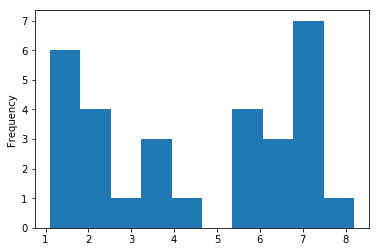

In [36]:
%matplotlib inline
df.diffc.plot.hist()

Объединим рубрики в *text* в одну строку через запятую:

In [37]:
df['rubric'] = [','.join(r) for r in df.rubric]

Давайте почистим текст новостей – уберем оттуда текст, не относящийся к новостям. Найдем лишнее:

In [ ]:
df.text[0]

Лишний текст находится после фразы 'Нашли опечатку?'. Так давайте будем разбивать строки по этой фразе с помощью метода `.split()` и брать все, что до нее (элемент с индексом 0).

In [38]:
df['clean_text'] = [t.split('Нашли опечатку?')[0] for t in df.text]

Осталось только заменить непонятные символы `\xa0` на пробелы:

In [39]:
df['clean_text'] = [t.replace("\xa0", " ") for t in df.clean_text]

In [40]:
df.clean_text[0]

'Российский военно-транспортный самолет Ил-112В совершил первый полет, сообщает Авиационный комплекс имени Ильюшина. Испытания прошли на аэродроме воронежского авиазавода ПАО «ВАСО», командиром экипажа был шеф-пилот ПАО «Ил» Герой России Николай Куимов. Первый полет стал завершением цикла аэродромной отработки, в ходе которой были проведены испытания всех систем, в том числе пробежки по аэродрому. Полет прошел в штатном режиме. В воздухе Ил-112В сопровождал самолет-лаборатория Ил-114ЛЛ. Ил-112В в перспективе должен заменить легкий транспортник Ан-26. Он будет использоваться для перевозки и десантирования легкой техники, грузов и бойцов, его грузоподъемность — около пяти тонн. Самолет сможет развивать скорость до 550 километров в час и совершать полеты на расстояние до 3,4 тысячи километров, а при взлете с грунтовых аэродромов и максимальной загрузкой — до 1,2 тысячи километров. Транспортник сможет взлетать с взлетно-посадочных полос длиной не более 900 метров. Пробег Ил-112В при посадк

Всё! Сохраняем датафрейм в файл. Для разнообразия сохраним в Excel:

In [41]:
df.to_excel('nplus-news.xlsx')